# Sumary
kaggleのタイタニック。乗客の生死を予測

# data import

In [1]:
import pandas as pd

#訓練とテストデータ。テストデータは、生死情報なし
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

'''
survival        Survival target columns
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd) 1が金持ち
name            Name
sex             Sex #名義特徴量
age             Age
sibsp           Number of Siblings/Spouses Aboard 兄弟、夫婦
parch           Number of Parents/Children Aboard 親子
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation 乗り込んだ港　#名義特徴量
'''


'\nsurvival        Survival target columns\n                (0 = No; 1 = Yes)\npclass          Passenger Class\n                (1 = 1st; 2 = 2nd; 3 = 3rd) 1\xe3\x81\x8c\xe9\x87\x91\xe6\x8c\x81\xe3\x81\xa1\nname            Name\nsex             Sex #\xe5\x90\x8d\xe7\xbe\xa9\xe7\x89\xb9\xe5\xbe\xb4\xe9\x87\x8f\nage             Age\nsibsp           Number of Siblings/Spouses Aboard \xe5\x85\x84\xe5\xbc\x9f\xe3\x80\x81\xe5\xa4\xab\xe5\xa9\xa6\nparch           Number of Parents/Children Aboard \xe8\xa6\xaa\xe5\xad\x90\nticket          Ticket Number\nfare            Passenger Fare\ncabin           Cabin\nembarked        Port of Embarkation \xe4\xb9\x97\xe3\x82\x8a\xe8\xbe\xbc\xe3\x82\x93\xe3\x81\xa0\xe6\xb8\xaf\xe3\x80\x80#\xe5\x90\x8d\xe7\xbe\xa9\xe7\x89\xb9\xe5\xbe\xb4\xe9\x87\x8f\n'

In [2]:
#訓練データを確認
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#テストデータを確認
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#欠損データの確認
print('confirm Nan value in train data set\n %s') % train.isnull().sum()
print('\nconfirm Nan value in test data set\n %s') % test.isnull().sum()

confirm Nan value in train data set
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

confirm Nan value in test data set
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### 訓練データはageとCabinとEmbarkedに欠損。テストデータはageとfareとcabinに欠損。

In [5]:
#特徴量を作ったり、欠損値を代入したり、値を標準化したりする。分析する前に一旦データを合体する。
all_data = pd.concat([train,test],axis=0)

In [6]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# Feature engineering
- 名前の長さ
- 家族のサイズ
- 肩書

# 名前の長さ

In [7]:
#generating Name length
all_data['NameLength'] = all_data['Name'].apply(lambda x:len(x))

# 家族のサイズ

In [8]:
#generating family size
#自分自身も1と数えるので+1
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1

/home/kyohei/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


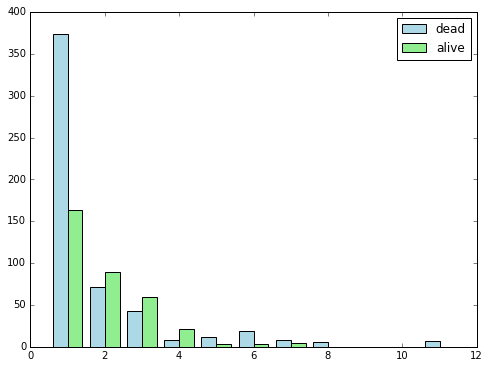

In [9]:
#家族のサイズが生死に関係する？
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
data_alive = all_data[all_data['Survived']==1]
data_dead = all_data[all_data['Survived']==0]
plt.bar(data_dead['FamilySize'].value_counts().index-0.2,data_dead['FamilySize'].value_counts().values,
       align='center',label='dead',width=0.4,color='lightblue')
plt.bar(data_alive['FamilySize'].value_counts().index+0.2,data_alive['FamilySize'].value_counts().values,
       align='center',label='alive',width=0.4,color='lightgreen')
plt.legend(loc='upper right')
plt.show()

- 独身は死にやすい、2人、3人、4人家族は生存者のほうが多い。それ以上も死にやすい
- single,small,largeに分ける。

In [10]:
all_data[all_data['FamilySize']==1]['FamilySize'] = 1 #single
all_data[(all_data['FamilySize'] < 5) & (all_data['FamilySize'] > 1)]['FamilySize'] = 2 #small
all_data[all_data['FamilySize'] > 5]['FamilySize'] = 2 #large

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

# 肩書

In [11]:
import re
def get_title(name):
    #regular expressionを使って肩書を探す。肩書は必ず大文字と小文字とピリオドで構成される。
    title_search = re.search(' ([A-Za-z]+)\.',name) #該当箇所を返す
    if title_search:
        #ピリオドを除いた部分だけ返す
        return title_search.group(1)
    return ''

In [12]:
titles = all_data['Name'].apply(get_title)
titles.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Don           1
Capt          1
Lady          1
Sir           1
Countess      1
Jonkheer      1
Dona          1
Mme           1
Name: Name, dtype: int64

In [13]:
#それぞれの肩書を数値に治す。少ない肩書はその他にまとめる。
#英語圏以外の肩書も混ざっているので、同じ意味を示す肩書はまとめる。
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Dr':5,'Rev':5,'Col':5,'Major':5,'Mlle':2,'Countess':5,
                 'Ms':2,'Lady':5,'Jonkheer':5,'Don':5,'Mme':2,'Capt':5,'Sir':5,'Dona':5}
titles = titles.map(title_mapping)
all_data['Title'] = titles

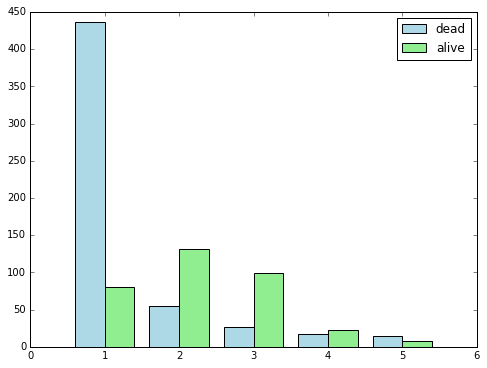

In [17]:
plt.figure(figsize=(8,6))
data_alive = all_data[all_data['Survived']==1]
data_dead = all_data[all_data['Survived']==0]
plt.bar(data_dead['Title'].value_counts().index-0.2,data_dead['Title'].value_counts().values,
       align='center',label='dead',width=0.4,color='lightblue')
plt.bar(data_alive['Title'].value_counts().index+0.2,data_alive['Title'].value_counts().values,
       align='center',label='alive',width=0.4,color='lightgreen')
plt.legend(loc='upper right')
plt.show()

# Mrはすごく死にやすい。

# 欠損値の補完
- Age
- Embarked
- Cabin
- Fare

# Embarked
- どこの港から乗ったかなので、クラスと乗車料金から推定する。

In [36]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,NameLength,FamilySize,Title
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,19,1,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,41,1,3


２つのデータは、料金は80で、クラスは1である。

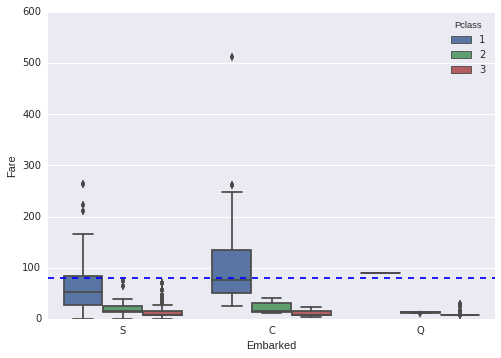

In [40]:
import seaborn as sns
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=all_data)
plt.axhline(80.,linestyle='--')
plt.show()

クラスが1で料金が80であれば、中央値から考えてEmbarkedはCと推測する。

In [58]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

# Fare
- embarkedはsで、pclassは3の乗客

In [61]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,NameLength,FamilySize,Title
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,18,1,1


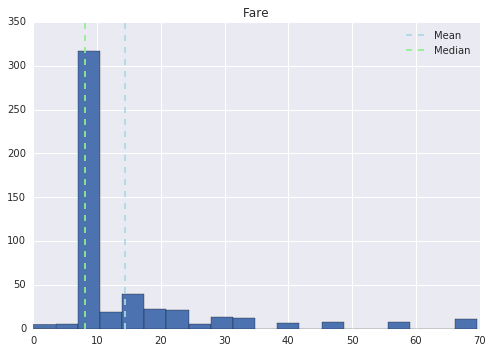

8.05


In [77]:
object_data = all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] == 3)]
object_data.hist('Fare',bins=20)
plt.axvline(object_data['Fare'].mean(),label='Mean',linestyle='--',color='lightblue')
plt.axvline(object_data['Fare'].median(),label='Median',linestyle='--',color='lightgreen')
plt.legend()
plt.show()
print(object_data['Fare'].median())

In [78]:
#上図よりmedianを代入する。
all_data['Fare'] = all_data['Fare'].fillna(object_data['Fare'].median())

# Age
- 欠損値が多いので回帰モデルを使ってAgeを予測する。
- ランダムフォレスト回帰を用いる

In [97]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
NameLength     1309 non-null int64
FamilySize     1309 non-null int64
Title          1309 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 163.6+ KB


- 回帰モデルを作成する前に、str型データを数値型のデータに変換する。質的変数で3つ以上種類がある場合は、ダミー変数に変換する。
- Embarked
- Sex

In [98]:
#Sex
sex_mapping = {'female':0,'male':1}
all_data['Sex'] = all_data['Sex'].map(sex_mapping)

In [102]:
#Embarked one hot encoding
dummy_embarked = pd.get_dummies(all_data['Embarked'],prefix='Embarked')
all_data = pd.concat([all_data,dummy_embarked],axis=1)

In [139]:
all_data.columns

Index([u'Age', u'Cabin', u'Embarked', u'Fare', u'Name', u'Parch',
       u'PassengerId', u'Pclass', u'Sex', u'SibSp', u'Survived', u'Ticket',
       u'NameLength', u'FamilySize', u'Title', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S'],
      dtype='object')

In [374]:
# 数値型の列をすべて取得
features_columns = [u'Parch',u'Pclass', u'Sex', u'SibSp',u'NameLength',
                    u'FamilySize',u'Title',u'Fare', u'Embarked_C', u'Embarked_Q',u'Embarked_S']

target_column = ['Age']

#訓練データ
age_X_train = all_data[all_data['Age'].notnull()].loc[:,features_columns].values
age_y_train = all_data[all_data['Age'].notnull()].loc[:,target_column].values

#予測したいデータ
age_X_test = all_data[all_data['Age'].isnull()].loc[:,features_columns].values
age_y_test = all_data[all_data['Age'].isnull()].loc[:,target_column].values

In [486]:
print('mse of mean value: %.3f') % (np.sum((age_y_train - np.mean(age_y_train))**2) / float(age_y_train.shape[0]))
print('mse of median value: %.3f') % (np.sum((age_y_train - np.median(age_y_train))**2) / float(age_y_train.shape[0]))

mse of mean value: 207.550
mse of median value: 211.089


# ランダムフォレスト回帰
- ランダムフォレストには、データセットの外れ値にあまり影響を受けずに、パラメータのチューニングをそれほど要求しないという利点がある。
- 個々の決定木の成長に平均二乗誤差が用いられる。
- 予測される目的変数は、すべての決定木の予測を平均して計算される。

In [375]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(age_X_train,age_y_train,test_size=0.2,random_state=1)

from sklearn.ensemble import RandomForestRegressor
#ランダムフォレスト回帰
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
forest = RandomForestRegressor(n_estimators=200,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('train mse: %.3f, test mse: %.3f') %(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print('train r2: %.3f, test r2: %.3f') %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred))

train mse: 25.611, test mse: 158.359
train r2: 0.869, test r2: 0.383


/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [376]:
from itertools import combinations

dim = len(features_columns) #
k_features = 3 #最小の組み合せ個数
indices = tuple(range(dim))
forest = RandomForestRegressor(n_estimators=200,criterion='mse',random_state=1,n_jobs=-1)

mse_scores_ = []
r2_scores_ = []
subsets_ = []
# 特徴量全部
X_train,X_test,y_train,y_test = train_test_split(age_X_train,age_y_train,test_size=0.4,random_state=1)
forest.fit(X_train[:,p],y_train[:,0])
y_test_pred = forest.predict(X_test[:,p])

subsets_.append(indices)
mse_scores_.append(mean_squared_error(y_test,y_test_pred))
r2_scores_.append(r2_score(y_test,y_test_pred))

while dim > k_features:
    mse_scores = []
    r2_scores = []
    subsets = []
    for p in combinations(indices,r=dim-1):
        X_train,X_test,y_train,y_test = train_test_split(age_X_train,age_y_train,test_size=0.4,random_state=1)
        forest.fit(X_train[:,p],y_train[:,0])
        y_test_pred = forest.predict(X_test[:,p])
        mse_scores.append(mean_squared_error(y_test,y_test_pred))
        r2_scores.append(r2_score(y_test,y_test_pred))
        subsets.append(p)
    
    best_mse = np.argmin(mse_scores)
    best_r2 = np.argmax(r2_scores)
    
    subsets_.append(subsets[best_mse])
    mse_scores_.append(mse_scores[best_mse])
    r2_scores_.append(r2_scores[best_r2])

    dim -= 1       

In [478]:
#決定係数と平均二乗誤差
print(r2_scores_)
print(mse_scores_)

[0.29198863987380375, 0.31853375538736228, 0.39654479942623855, 0.39750518722701611, 0.41816931675118107, 0.41896846650560282, 0.41863407315929035, 0.41442680005425903, 0.40606308467638441]
[165.12546119121964, 158.93449493219057, 140.7404229858987, 140.51643720338589, 135.69705984595953, 135.51067869561155, 135.58866735319367, 136.56990572160331, 138.52052747264057]


In [425]:
subsets_[5]

(1, 2, 3, 6, 8, 9)

- 二乗誤差を選んだが、あまり精度は良くない
- 異なる回帰モデルを使ったほうがよいかもしれないが、中央値や平均値を入れるよりはまし

In [451]:
forest = RandomForestRegressor(n_estimators=500,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(age_X_train[:,subsets_[4]],age_y_train[:,0])
y_test_predict = forest.predict(age_X_test[:,subsets_[4]])

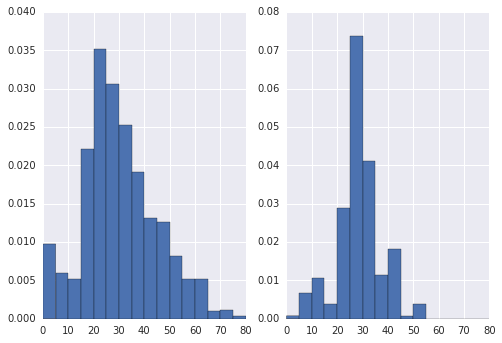

In [452]:
fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].hist(age_y_train,bins=np.arange(0,85,5),normed=True)
ax[1].hist(np.around(y_test_predict).astype(int),bins=np.arange(0,85,5),normed=True)
plt.show()

In [474]:
a = all_data['Age'].fillna(-1)
a[a==-1] = np.around(y_test_predict).astype(int)

In [475]:
all_data['Age'] = a

(array([  52.,   40.,   41.,  121.,  222.,  257.,  186.,  115.,   93.,
          67.,   48.,   27.,   27.,    5.,    6.,    2.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]),
 <a list of 16 Patch objects>)

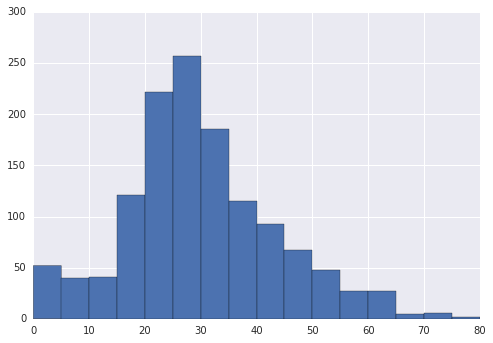

In [477]:
plt.hist(all_data['Age'],bins=np.arange(0,85,5))

# 予測

In [499]:
#訓練データとテストデータを再度分割する。
test = all_data[all_data['Survived'].isnull()]
train = all_data[all_data['Survived'].notnull()]

In [503]:
train.columns

Index([u'Age', u'Cabin', u'Embarked', u'Fare', u'Name', u'Parch',
       u'PassengerId', u'Pclass', u'Sex', u'SibSp', u'Survived', u'Ticket',
       u'NameLength', u'FamilySize', u'Title', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'Adult'],
      dtype='object')

In [555]:
#訓練データを再分割
X = train[[u'Age',u'Fare', u'Parch',u'Pclass', u'Sex', u'SibSp',
       u'NameLength', u'FamilySize', u'Title', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'Adult']].values
y = train['Survived'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

# ランダム・フォレスト

In [600]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0,n_jobs=-1,max_depth=6)

forest.fit(X_train,y_train)
pred_train = forest.predict(X_train)
pred_test = forest.predict(X_test)

print('train accuracy: %.3f') % accuracy_score(y_train,pred_train)
print('test accuracy: %.3f') % accuracy_score(y_test,pred_test)

train accuracy: 0.903
test accuracy: 0.782


In [601]:
#importance
features_label = [u'Age',u'Fare', u'Parch',u'Pclass', u'Sex', u'SibSp',
       u'NameLength', u'FamilySize', u'Title', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'Adult']
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%s,%.3f') %(features_label[indices[f]],importances[indices[f]])

Title,0.233
Sex,0.191
Fare,0.131
NameLength,0.102
Age,0.087
Pclass,0.075
FamilySize,0.057
SibSp,0.047
Parch,0.020
Embarked_S,0.018
Adult,0.017
Embarked_C,0.012
Embarked_Q,0.009


In [604]:
from sklearn.grid_search import GridSearchCV
forest = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0,n_jobs=-1)
params_range = [i for i in np.arange(2,11,1)]
param_grid = {'max_depth':params_range
              ,'max_leaf_nodes':params_range
             ,'min_samples_split':[3, 5, 10, 15, 20, 25, 30, 40, 50, 100],}

gs = GridSearchCV(estimator=forest,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,n_jobs=-1)

gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.850187265918
{'min_samples_split': 20, 'max_leaf_nodes': 9, 'max_depth': 3}


In [609]:
test_index = test['PassengerId'].values
test_cal = test[[u'Age',u'Fare', u'Parch',u'Pclass', u'Sex', u'SibSp',
       u'NameLength', u'FamilySize', u'Title', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'Adult']].values
forest = RandomForestClassifier(criterion='entropy',n_estimators=1000,random_state=0,n_jobs=-1,
                               max_depth=3,max_leaf_nodes=9,min_samples_split=20)
forest.fit(X_train,y_train)
prediction = forest.predict(test_cal)

In [610]:
submission = pd.DataFrame({
        'PassengerId':test_index,
        'Survived':prediction
    })
submission.to_csv('submission.csv',index=False)